In [53]:
from ucimlrepo import fetch_ucirepo 

import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error

from kmodes.kmodes import KModes

In [4]:
pd.set_option('display.max_colwidth', None)

In [5]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

# metadata and variable information
# print(bank_marketing.metadata)
display(bank_marketing.variables) 

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,"contact communication type (categorical: 'cellular','telephone')",None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


In [6]:
df = pd.concat([X, y], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


<Axes: ylabel='Frequency'>

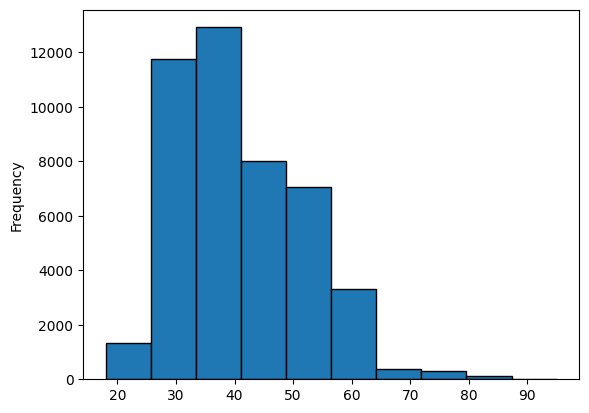

In [7]:
df["age"].plot.hist(bins=10, edgecolor='black')

In [8]:
df_bins = df.copy()
df_bins['age_bin'] = pd.cut(
    df_bins['age'], 
    [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
    labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']
)
df_bins = df_bins.drop(columns=["age"])
print(df_bins.shape)
df_bins.head()

(45211, 17)


,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,age_bin
0,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no,50-60
1,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no,40-50
2,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no,30-40
3,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no,40-50
4,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no,30-40


In [9]:
df_bins.dtypes

job              object
marital          object
education        object
default          object
balance           int64
housing          object
loan             object
contact          object
day_of_week       int64
month            object
duration          int64
campaign          int64
pdays             int64
previous          int64
poutcome         object
y                object
age_bin        category
dtype: object

In [10]:
df_cleaned = df_bins.copy()
df_cleaned["poutcome"] = df_cleaned["poutcome"].apply(lambda x: 'unknown' if pd.isna(x) else x)
df_cleaned["contact"] = df_cleaned["contact"].apply(lambda x: 'unknown' if pd.isna(x) else x)
df_cleaned["education"] = df_cleaned["education"].apply(lambda x: 'unknown' if pd.isna(x) else x)
df_cleaned["job"] = df_cleaned["job"].apply(lambda x: 'unknown' if pd.isna(x) else x) 

In [11]:
df_encoded = df_cleaned.copy()
encoder = preprocessing.LabelEncoder()
df_encoded = df_encoded.apply(encoder.fit_transform)
df_encoded.head() 

,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,age_bin
0,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0,4
1,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0,3
2,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0,2
3,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0,3
4,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0,2


In [25]:
response = "y"
y_encoded = df_encoded[[response]]
X_encoded = df_encoded.drop(columns=[response])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

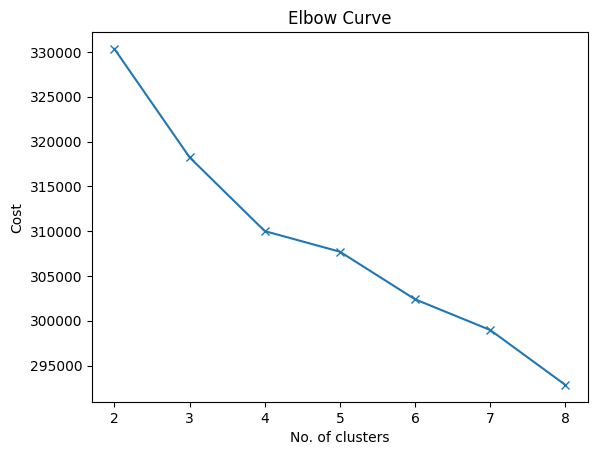

In [40]:
cost = []
K = [2, 3, 4, 5, 6, 7, 8]
for k in list(K):
    kmode = KModes(n_clusters=k, init = "random", n_init = 5) #, verbose=1)
    kmode.fit_predict(X_encoded)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()

In [49]:
k = 2
kmode = KModes(n_clusters=k, init = "random", n_init = 5)
kmode.fit_predict(X_encoded)

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

In [50]:
y_pred = kmode.predict(X_encoded)

In [51]:
df_final = df_encoded.copy()
df_final["y_pred"] = y_pred

In [52]:
df_final

,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y,age_bin,y_pred
0,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0,4,0
1,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0,3,0
2,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0,2,0
3,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0,3,0
4,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1,4,1
45207,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1,6,1
45208,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1,6,0
45209,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0,4,0


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

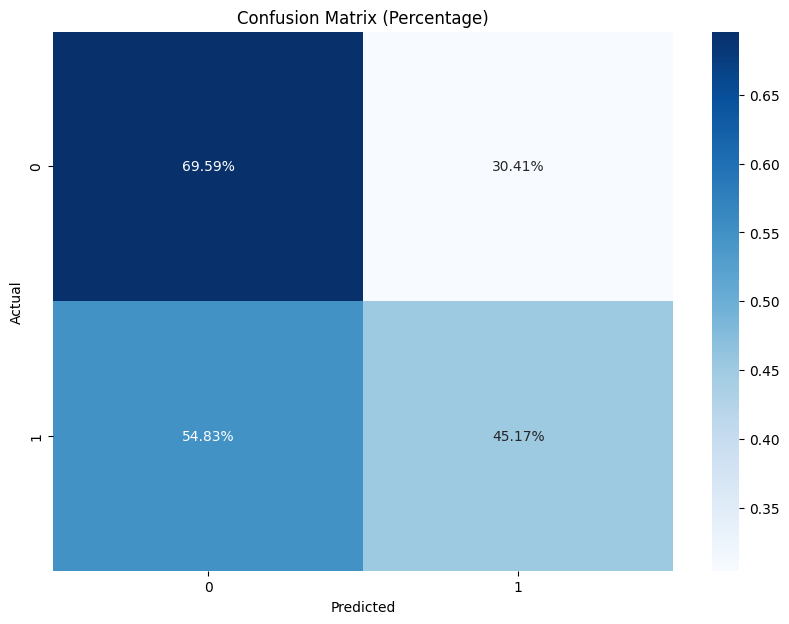

In [59]:
cm = confusion_matrix(y_encoded, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", cmap="Blues")
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

